In [39]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [40]:
#Declare parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [41]:
#Create training data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [42]:
#Declare inputs and variables
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

randomizer=np.random
W=tf.Variable(randomizer.randn(), tf.float32, name="weight")
b=tf.Variable(randomizer.randn(), tf.float32, name="bias")

In [43]:
#Declare learning model
linear_model=tf.add(tf.multiply(W,x),b)

#Model loss
loss=tf.reduce_sum(tf.square(linear_model-y)) #sum of squares
loss_=tf.reduce_sum(tf.pow(linear_model-y,2))/(2*n_samples) #mean squared error

#Optimizer
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_)


Epoch: 0050 cost= 0.089415096 W= 0.312075 b= 0.351981
Epoch: 0100 cost= 0.087975956 W= 0.308359 b= 0.378714
Epoch: 0150 cost= 0.086703196 W= 0.304864 b= 0.403857
Epoch: 0200 cost= 0.085577667 W= 0.301577 b= 0.427505
Epoch: 0250 cost= 0.084582284 W= 0.298485 b= 0.449746
Epoch: 0300 cost= 0.083702035 W= 0.295577 b= 0.470665
Epoch: 0350 cost= 0.082923643 W= 0.292842 b= 0.490339
Epoch: 0400 cost= 0.082235321 W= 0.29027 b= 0.508843
Epoch: 0450 cost= 0.081626616 W= 0.287851 b= 0.526247
Epoch: 0500 cost= 0.081088401 W= 0.285575 b= 0.542616
Epoch: 0550 cost= 0.080612473 W= 0.283435 b= 0.558011
Epoch: 0600 cost= 0.080191635 W= 0.281423 b= 0.572491
Epoch: 0650 cost= 0.079819508 W= 0.279529 b= 0.586111
Epoch: 0700 cost= 0.079490490 W= 0.277749 b= 0.598921
Epoch: 0750 cost= 0.079199634 W= 0.276074 b= 0.610968
Epoch: 0800 cost= 0.078942508 W= 0.274499 b= 0.622298
Epoch: 0850 cost= 0.078715190 W= 0.273018 b= 0.632952
Epoch: 0900 cost= 0.078514241 W= 0.271625 b= 0.642974
Epoch: 0950 cost= 0.078336589

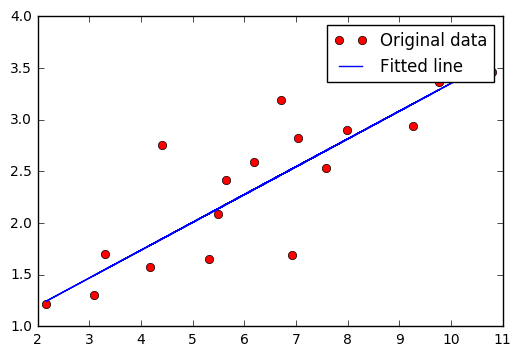

In [45]:
#Initialize variables
init = tf.global_variables_initializer()

#Perform learning
with tf.Session() as sess:
    sess.run(init)
    for i in range(training_epochs):
        for (x_, y_) in zip(train_X, train_Y):
            sess.run(optimizer, {x:x_, y:y_})

    #Display logs per epoch step
        if (i+1) % display_step == 0:
            c = sess.run(loss_, feed_dict={x: train_X, y:train_Y})
            print "Epoch:", '%04d' % (i+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(loss_, feed_dict={x: train_X, y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()